# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Churn.csv")

### Understanding the data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# show the number of columns and rows
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# check for missing or na values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Get customer churn count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Manipulation

In [9]:
# what is the percentage of customers that are leaving?
num_retained = df[df.Churn == 'No'].shape[0]
num_Churned = df[df.Churn == 'Yes'].shape[0]

#print the percentage of customer that stayed
print( num_retained / (num_retained + num_Churned) * 100,'% of customers stayed with the company')

#print the percentage of customer that left
print( num_Churned / (num_retained + num_Churned) *100,'% of customers left with the company')

73.4630129206304 % of customers stayed with the company
26.536987079369588 % of customers left with the company


In [10]:
# Remove unnecessary columns
cleaned_df = df.drop('customerID',axis = 1)

In [11]:
# Look at the numbers of rows and cols in the data set
cleaned_df.shape

(7043, 20)

In [12]:
# convert all the non-numeric columns to numeric
for column in cleaned_df.columns:
    if cleaned_df[column].dtype==np.number:
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
    

In [13]:
# show the new data set data types
cleaned_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [14]:
# show the first 5 rows of the new data set
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


### Data Visualization

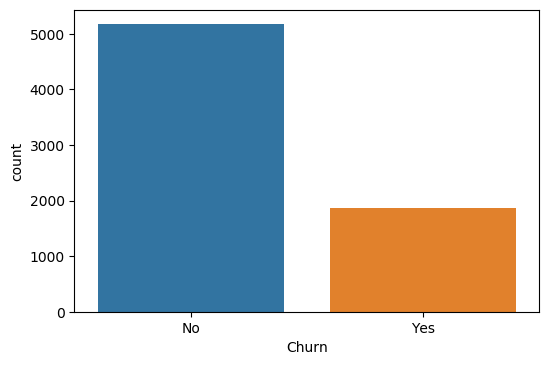

In [15]:
# Visualize the count of customer churn
plt.figure(dpi=100)
sns.countplot(df['Churn'])

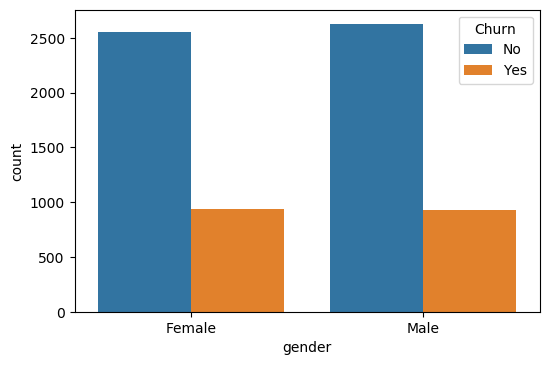

In [16]:
# Visualalize the churn count for both males and females
plt.figure(dpi=100)
sns.countplot(x='gender',hue='Churn',data = df)

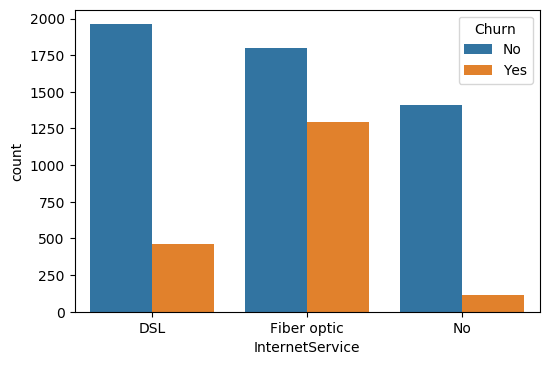

In [17]:
# visualize the churn count for the internet service
plt.figure(dpi=100)
sns.countplot(x='InternetService',hue='Churn',data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000289A7015EC8>,
      dtype=object)

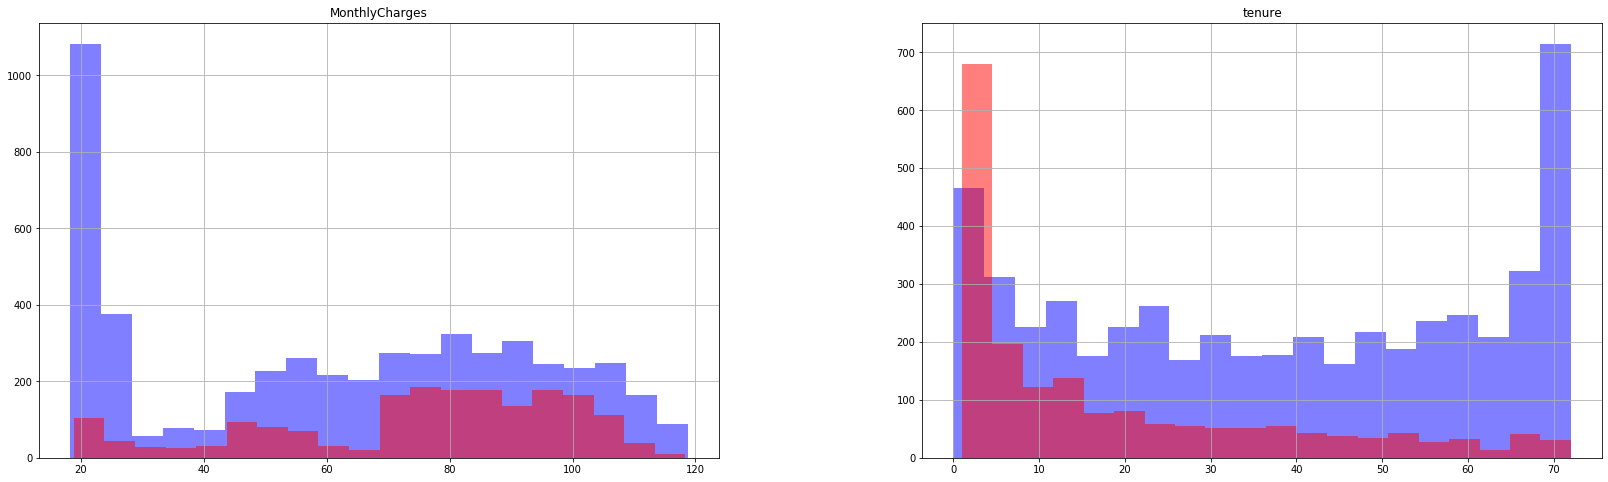

In [18]:
numerical_features = ['tenure', 'MonthlyCharges']
fig , ax = plt.subplots(1,2, figsize=(28,8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5,ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5,ax=ax)

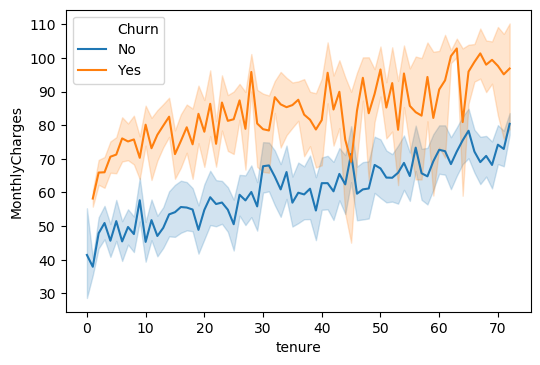

In [19]:
plt.figure(dpi=100)
sns.lineplot(df['tenure'],df['MonthlyCharges'],hue=df['Churn'])
plt.show()

## From above data it is been observed mostly we have categorical features 
## but there in between there are 2 features that can help us in getting our required implementation and that is:-
# Tenure
# Monthly Charges

### Implement Machine Learning Models

In [20]:
# Scaled the data
x = cleaned_df.drop('Churn', axis=1) # Feature data set
y = cleaned_df['Churn'] # target data set

x = StandardScaler().fit_transform(x)

In [21]:
x=df[['tenure','MonthlyCharges']]
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [22]:
# Split the data into 80% training and 20% testing
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2, random_state = 42)
x_train.head()

,tenure,MonthlyCharges
2142,21,64.85
1623,54,97.20
6074,1,23.45
1362,4,70.20
6754,0,61.90


In [23]:
# Create the model
model = LogisticRegression()
# Train the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# create the predictions on the test data
pred = model.predict(x_test)

# print the pridiction
print(pred)

[0 0 0 ... 0 0 0]


In [25]:
# create the confusion matrix
print(f"Confusion Matrix \n\n",confusion_matrix(y_test,pred))

Confusion Matrix 

 [[944  92]
 [193 180]]


In [26]:
print(accuracy_score(y_test,pred)*100)

79.77288857345636


In [27]:
# check the precision , recall, f1-score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



### Model Evaluation

In [28]:
X = cleaned_df.drop('Churn', axis=1) # Feature data set
Y = cleaned_df['Churn'] # target data set

X = StandardScaler().fit_transform(X)

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2, random_state = 42)

In [30]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
pred =model1.predict(X_test)
print(pred)

[ 0.52235074  0.14914713 -0.10036558 ...  0.08905097  0.0241884
  0.44925667]


In [36]:
Y_test.to_numpy()[:5]

array([1, 0, 0, 1, 0])

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
mse = mean_squared_error(Y_test, pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")

MSE: 0.14
RMSE: 0.37


In [41]:
acc = r2_score(Y_test, pred)
print(f"Accuracy: {acc*100:.2f}")

Accuracy: 29.29


In [ ]:
# Here we predict the values in Logistic Regression Model and K-nearest-neighbors model and find that which have
# more accurate and then we decide which model is best. here we see that the logistic regression is more accurate the 
# K-nearest-neighbors so logistic regression is best.

### Final Conclusions

In [44]:
import pickle
fp=open('customer_churn.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [50]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('customer_churn.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Customer Churn')

canvas = tk.Canvas(root, height=350, width=800)

im = PIL.Image.open("Running-4-the-Exit-2-844x422.png")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

ten=tk.IntVar();
mnth_chr=tk.DoubleVar()

l=tk.Label(root,text='Prediction Of Customer Churn', bd=2,relief='sunken')
l.config(bg='black',fg='red', font=('Courier', 20, 'bold'))
l.place(relx=0.53, rely=0.02, relwidth=0.7, relheight=0.1, anchor='n')

l1 = tk.Label(root, text="Enter Tenure",bd=1,relief='sunken')
l1.config(bg='skyblue', fg='#3E3E43', font=('Courier', 12, 'bold'))
l1.place(relx=0.10, rely=0.20, relwidth=0.16, relheight=0.07)

e1 = tk.Entry(root,textvariable=ten,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.26, rely=0.20, relwidth=0.07, relheight=0.07)

l2 = tk.Label(root, text="Enter Monthly Charges",bd=1,relief='sunken')
l2.config(bg='orange', fg='#3E3E43', font=('Courier', 12, 'bold'))
l2.place(relx=0.32, rely=0.3, relwidth=0.27, relheight=0.07)

e2 = tk.Entry(root,textvariable=mnth_chr,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e2.place(relx=0.59, rely=0.3, relwidth=0.07, relheight=0.07)

b = tk.Button(root, text='Predict', command=lambda : predict())
b.config(bg='green', fg='yellow', font=('Courier', 12, 'bold'),border=5)
b.place(relx=0.6, rely=0.45, relwidth=0.17, relheight=0.08)

def predict():
    t = ten.get()
    mc = mnth_chr.get()
    features = [ [ t, mc] ]
    m = model.predict(features)[0]
    if m==1:
        text ="Customer's Churn is Yes."
    else:
        text ="Customer's Churn is No"
        
    label = tk.Label(root,text=text,relief='sunken')
    label.config(bg='#074d5e',fg='#FFFFFF',font=('Courier', 16))
    label.place(relx=0.2, rely=0.85, relwidth=0.4, relheight=0.065)


canvas.pack()
root.mainloop()